In [1]:
import  os                              as os
import  cv2                             as cv2
import  numpy                           as np
import  pandas                          as pd
import  matplotlib.pyplot               as plt

from    sklearn.metrics                 import ConfusionMatrixDisplay
from    sklearn.mixture                 import GaussianMixture
from    sklearn.decomposition           import PCA
from    sklearn.discriminant_analysis   import LinearDiscriminantAnalysis
from    sklearn.model_selection         import cross_val_score
from    sklearn.model_selection         import KFold
from    matplotlib.colors               import ListedColormap
from    matplotlib.patches              import Ellipse

<center><font color="#e30b5d"><h1>Question 6</h1></font></center>
<center><font color="#00FF00"><h2>Part A</h2></font></center>

In [5]:
dataset_address = 'C:\\Users\\User\\Documents\\MachineLearningTA\\ML_HW5\\Q6\\Images'
os.chdir(dataset_address)
list_dir = os.listdir()

Red  = []
Blue = []

for file_name in list_dir :
    image_address = dataset_address+"/"+str(file_name)
    current_image = cv2.imread(image_address)
    B,G,R=np.mean(np.mean(current_image,axis=1),axis=0).astype(int)
    Red.append(R)
    Blue.append(B)
X = np.array([Red, Blue]).T

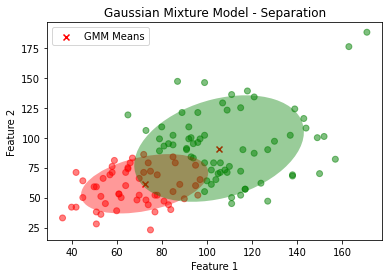

In [6]:
# Fit the GMM model
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)

# Predict cluster labels for the data points
labels = gmm.predict(X)

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=ListedColormap(list('rg')), alpha=0.5)
plt.title('Gaussian Mixture Model - Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the means of the Gaussian components
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', color='red', label='GMM Means')

# Plot the covariance ellipses for each Gaussian component
for i , c in zip(range(n_components), list('rg')):
    cov_matrix = gmm.covariances_[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    width, height = 2 * np.sqrt(2) * np.sqrt(eigenvalues)
    ell = Ellipse(gmm.means_[i], width, height, angle * 180 / np.pi, alpha=0.4)
    ell.set_facecolor(c)
    plt.gca().add_patch(ell)

plt.legend()
plt.show()

In [7]:
gmm.means_

array([[ 72.39408855,  61.5217794 ],
       [105.43120769,  90.92798241]])

In [8]:
gmm.covariances_

array([[[398.19036086, 132.1748784 ],
        [132.1748784 , 306.6705611 ]],

       [[707.78454423, 261.16777715],
        [261.16777715, 987.36270386]]])

<center><font color="#00FF00"><h2>Part B</h2></font></center>

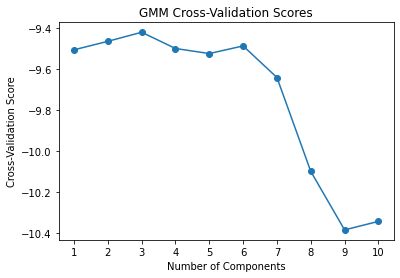

The optimal number of components is 3


In [9]:
# Define the range of components to evaluate
components_range = range(1, 11)

# Perform k-fold cross-validation for each number of components
cv_scores = []
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=0)

for n_components in components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    scores = cross_val_score(gmm, X, cv=kf)
    cv_scores.append(np.mean(scores))

# Find the optimal number of components with the highest cross-validation score
optimal_components = components_range[np.argmax(cv_scores)]

# Plot the cross-validation scores
import matplotlib.pyplot as plt

plt.plot(components_range, cv_scores, marker='o')
plt.title('GMM Cross-Validation Scores')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.xticks(components_range)
plt.show()

print(f"The optimal number of components is {optimal_components}")


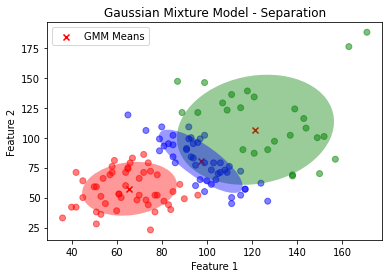

In [10]:
# Fit the GMM model
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)

# Predict cluster labels for the data points
labels = gmm.predict(X)

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=ListedColormap(list('rgb')), alpha=0.5)
plt.title('Gaussian Mixture Model - Separation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the means of the Gaussian components
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', color='red', label='GMM Means')

# Plot the covariance ellipses for each Gaussian component
for i , c in zip(range(n_components), list('rgb')):
    cov_matrix = gmm.covariances_[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.arctan2(eigenvectors[0, 1], eigenvectors[0, 0])
    width, height = 2 * np.sqrt(2) * np.sqrt(eigenvalues)
    ell = Ellipse(gmm.means_[i], width, height, angle * 180 / np.pi, alpha=0.4)
    ell.set_facecolor(c)
    plt.gca().add_patch(ell)

plt.legend()
plt.show()